In [64]:
#use mnist dataset train a model to class
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# load data,split data to test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [65]:
img1 = x_train[0]
print(img1.shape)

(28, 28)


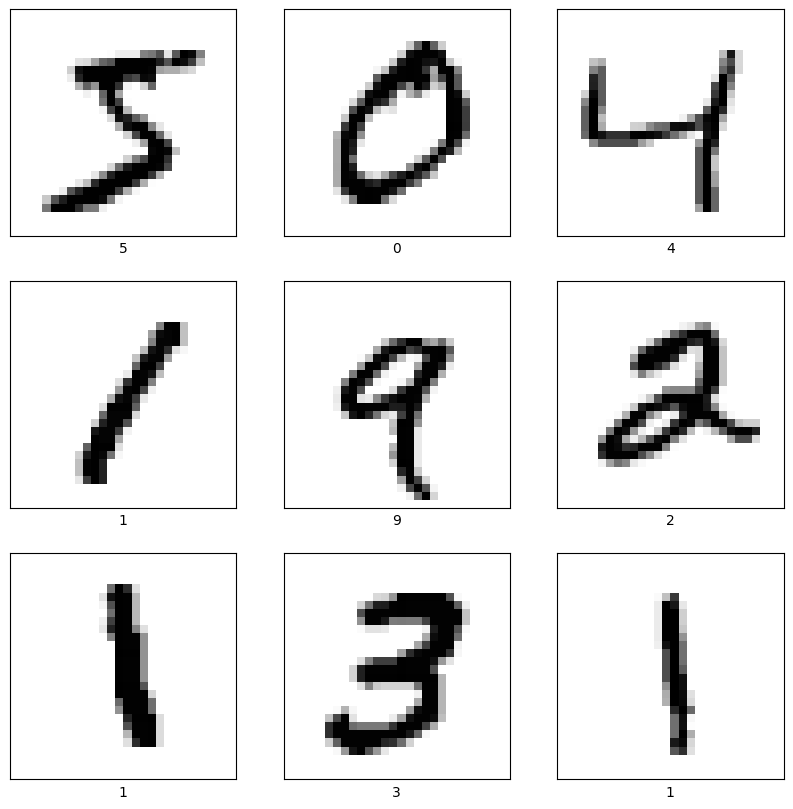

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt

# print front 9 picture
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


In [67]:
#change feature size
feature_size = img1.shape[0] * img1.shape[1]
print(feature_size)

784


In [68]:
#Normalization(归一化,多维转为1维)
x_train = x_train.reshape(x_train.shape[0], feature_size)
x_test = x_test.reshape(x_test.shape[0], feature_size)
#print(x_train.shape)
#print(x_test.shape)
#preprocessing data， Standardization
x_train, x_test = x_train / 255.0, x_test / 255.0
#format output
print(x_train[0])


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [69]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)  # 从(60000,)变为(60000, 10)
y_test = to_categorical(y_test)    # 从(10000,)变为(10000, 10)
print(y_test.shape)

(10000, 10)


In [70]:
#set model
from keras.layers import Dense, Activation
from keras.models import Sequential

mlp = keras.Sequential()
mlp.add(Dense(392, activation='sigmoid', input_dim=feature_size))
mlp.add(Dense(392, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
mlp.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 392)            │       154,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         3,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465,706 (1.78 MB)

 Trainable params: 465,706 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mlp.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8147 - loss: 0.6152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9519 - loss: 0.1587
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9690 - loss: 0.1000
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9796 - loss: 0.0658
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9839 - loss: 0.0485
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9898 - loss: 0.0339
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9920 - loss: 0.0261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9929 - loss: 0.0204
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9971 - loss: 0.0095


In [77]:
#find accurancy
import numpy as np
import sklearn.metrics as metrics

# predict of test and train data
y_train_pred_probs = mlp.predict(x_train)
y_train_predict = np.argmax(y_train_pred_probs, axis=1)  # 预测结果是整数类别
y_test_pred_probs = mlp.predict(x_test)
y_test_predict = np.argmax(y_test_pred_probs, axis=1)  # 预测结果是整数类别

# 确保目标标签和预测结果格式一致
if len(y_train.shape) > 1:  # 检查是否为one-hot编码
    y_train_true = np.argmax(y_train, axis=1)  # 将one-hot编码转换为整数类别
    y_test_true = np.argmax(y_test, axis=1)    # 将one-hot编码转换为整数类别
else:
    # 如果已经是整数类别，直接使用
    y_train_true = y_train
    y_test_true = y_test

train_accuracy = metrics.accuracy_score(y_train_true, y_train_predict)
test_accuracy = metrics.accuracy_score(y_test_true, y_test_predict)

print(f"trainset accurancy : {train_accuracy:.4f}")
print(f"testset accurancy: {test_accuracy:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
trainset accurancy : 0.9953
testset accurancy: 0.9786


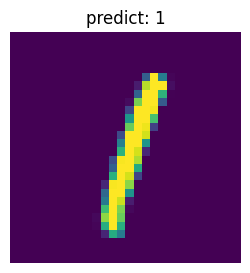

In [82]:
#img test
img2 = x_test[5].reshape(28, 28)
fig2 = plt.figure(figsize=(3, 3))
plt.imshow(img2)
plt.title(f"predict: {y_test_predict[5]}")
plt.axis('off')
plt.show()